<a href="https://colab.research.google.com/github/josegabrielguerrero26/CSE450-machinelearning/blob/main/final/trustlevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ** INTRODUCTION**
This is a db with categorical and descriptive data of customers in a U.S business unit.

The business is dedicated to rent cars to customers and the objectives of this machine learning model is to categorize if the customers has a high, medium or low trust level.

High level indicates that I should rent.

Medium possible danger and so it needs to go over second operational revision process.

Low must not rent the car.

** The numbers, names have been changed to protect the data **

## Libraries- Dataset

In [50]:
#!pip install ydata_profiling # data Table Analysis
#!pip install typing_extensions # data Table Analysis
#!pip install imblearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # for graphs
from sklearn.model_selection import train_test_split #Model Split to train
from sklearn.metrics import accuracy_score           #Accuracy model
from sklearn.preprocessing import StandardScaler


In [51]:
cus = pd.read_csv('/content/cust_test.csv')

In [52]:
cus.head(5)


,cust_id,month_birth,dob,year_birth,Unnamed: 4,country,times,cash_vs_card,pay_level,marital,level_edu,salary
0,1,3,14,1994,NaN,UTAH,4,cash,LOW,married,elementary,211637
1,2,5,6,1970,NaN,MEXICO,1,cash,HIGH,single,elementary,129657
2,3,5,17,1973,NaN,UTAH,1,cash,LOW,married,high_school,160686
3,4,5,9,1976,NaN,MEXICO,5,cash,HIGH,married,college,86044
4,5,4,29,1989,NaN,MEXICO,1,card,HIGH,married,high_school,192280



## Table Description

In [53]:
cus.describe(include='all')
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49967 entries, 0 to 49966
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        49967 non-null  int64  
 1    month_birth   49967 non-null  int64  
 2   dob            49967 non-null  int64  
 3   year_birth     49967 non-null  int64  
 4   Unnamed: 4     0 non-null      float64
 5   country        49967 non-null  object 
 6   times          49967 non-null  int64  
 7   cash_vs_card   49967 non-null  object 
 8   pay_level      49967 non-null  object 
 9   marital        49967 non-null  object 
 10  level_edu      49967 non-null  object 
 11  salary         49967 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 4.6+ MB


In [54]:
cus.nunique()


cust_id          49967
 month_birth        12
dob                 31
year_birth          89
Unnamed: 4           0
country             11
times              169
cash_vs_card         3
pay_level            3
marital              2
level_edu            4
salary           44132
dtype: int64

In [55]:
#nun values
nan_count = cus.isnull().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 49967


## Data Wrangling - Missing Values, transformation


https://jamesrledoux.com/code/imputation

In [56]:
#unkown values

(cus=='unknown').sum()

cust_id          0
 month_birth     0
dob              0
year_birth       0
Unnamed: 4       0
country          0
times            0
cash_vs_card     0
pay_level        0
marital          0
level_edu        0
salary           0
dtype: int64

In [57]:
df_im=cus

<ipython-input-58-cc359407d008>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df_im.corr()


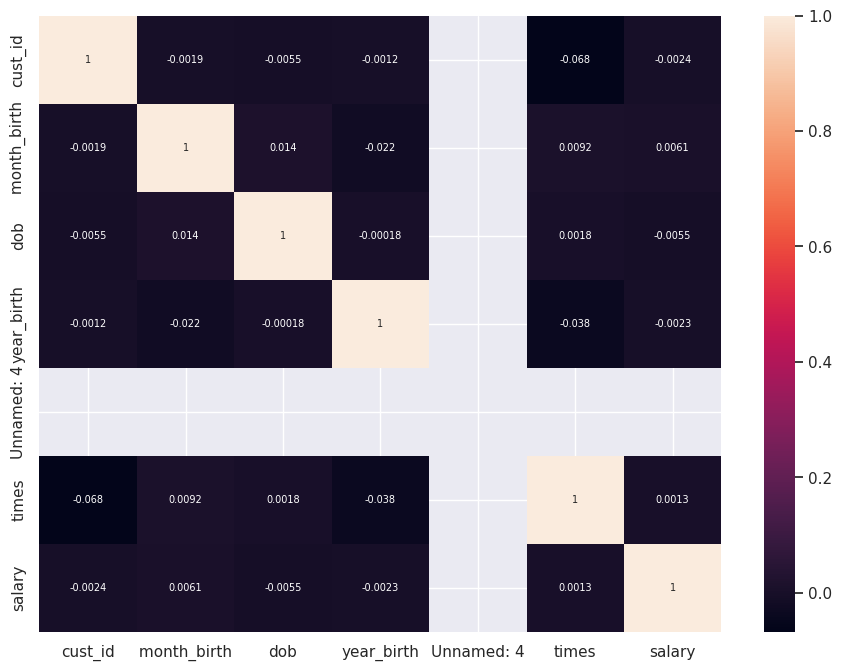

<Figure size 2000x1000 with 0 Axes>

,cust_id,month_birth,dob,year_birth,Unnamed: 4,times,salary
cust_id,1.000000,-0.001914,-0.005475,-0.001193,NaN,-0.067582,-0.002365
month_birth,-0.001914,1.000000,0.014375,-0.021554,NaN,0.009162,0.006107
dob,-0.005475,0.014375,1.000000,-0.000180,NaN,0.001809,-0.005503
year_birth,-0.001193,-0.021554,-0.000180,1.000000,NaN,-0.038254,-0.002308
Unnamed: 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
times,-0.067582,0.009162,0.001809,-0.038254,NaN,1.000000,0.001348
salary,-0.002365,0.006107,-0.005503,-0.002308,NaN,0.001348,1.000000


In [58]:
corrMatrix = df_im.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 7})
plt.figure(figsize=(20, 10))
plt.show()

corrMatrix

## Encoded Values

In [59]:
df_im['pay_level'].unique()

array(['LOW', 'HIGH', 'MEDIUM'], dtype=object)

In [60]:
# label encoded values

df_im['country'] = df_im['country'].astype('category')
df_im['cash_vs_card'] = df_im['cash_vs_card'].astype('category')
df_im['pay_level'] = df_im['pay_level'].astype('category')
df_im['level_edu'] = df_im['level_edu'].astype('category')
df_im['marital'] = df_im['marital'].astype('category')


# cat codes
df_im['country'] = df_im['country'].cat.codes
df_im['cash_vs_card'] = df_im['cash_vs_card'].cat.codes
df_im['level_edu'] = df_im['level_edu'].cat.codes
df_im['marital']=df_im['marital'].cat.codes
df_im['pay_level'] = df_im['pay_level'].cat.codes


df_im.columns

In [61]:
df_im['pay_level'].unique()

array([1, 0, 2], dtype=int8)

In [62]:
df_im['pay_level'] = np.where(df_im["pay_level"] == "LOW", 1,
                               np.where(df_im["pay_level"] == "MEDIUM", 2, 3))


In [63]:
df_im['pay_level']. unique()

array([3])

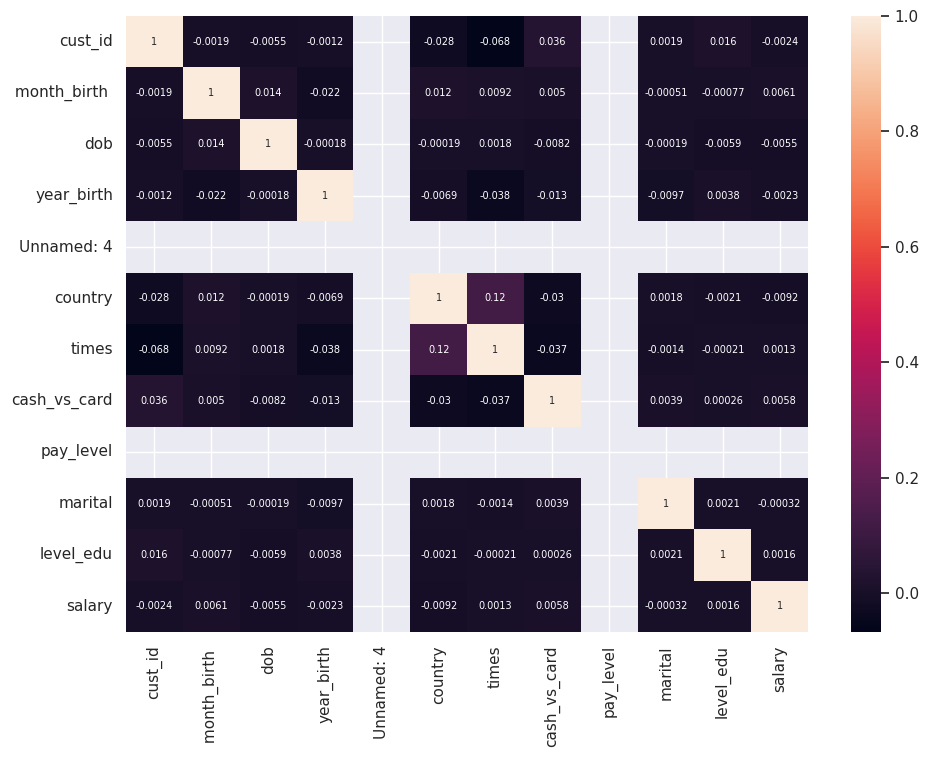

<Figure size 2000x1000 with 0 Axes>

,cust_id,month_birth,dob,year_birth,Unnamed: 4,country,times,cash_vs_card,pay_level,marital,level_edu,salary
cust_id,1.000000,-0.001914,-0.005475,-0.001193,NaN,-0.028077,-0.067582,0.036257,NaN,0.001917,0.015517,-0.002365
month_birth,-0.001914,1.000000,0.014375,-0.021554,NaN,0.011665,0.009162,0.005012,NaN,-0.000513,-0.000769,0.006107
dob,-0.005475,0.014375,1.000000,-0.000180,NaN,-0.000190,0.001809,-0.008159,NaN,-0.000189,-0.005870,-0.005503
year_birth,-0.001193,-0.021554,-0.000180,1.000000,NaN,-0.006911,-0.038254,-0.012992,NaN,-0.009674,0.003752,-0.002308
Unnamed: 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,-0.028077,0.011665,-0.000190,-0.006911,NaN,1.000000,0.123162,-0.030254,NaN,0.001810,-0.002064,-0.009182
times,-0.067582,0.009162,0.001809,-0.038254,NaN,0.123162,1.000000,-0.037265,NaN,-0.001443,-0.000209,0.001348
cash_vs_card,0.036257,0.005012,-0.008159,-0.012992,NaN,-0.030254,-0.037265,1.000000,NaN,0.003898,0.000263,0.005779
pay_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,0.001917,-0.000513,-0.000189,-0.009674,NaN,0.001810,-0.001443,0.003898,NaN,1.000000,0.002139,-0.000316


In [64]:
corrMatrix = df_im.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 7})
plt.figure(figsize=(20, 10))
plt.show()

corrMatrix

## Standarized

In [65]:
# Use StandardScaler() to normolize data around a mean of 0

## Data Table Analysis

In [66]:
sns.set()
sns.set_style('white')
graph1=sns.histplot(data=df_im, x='age', bins='auto')#hue='species'
graph1.set_title("Age Histogram")

ValueError: Could not interpret value `age` for `x`. An entry with this name does not appear in `data`.

In [ ]:
sns.set()
sns.set_style('white')

graph2 = sns.countplot(data=df_im, x='poutcome', hue='marital')

# Create a FacetGrid for further customization
facet_grid = sns.FacetGrid(df_im, row="contact", col='marital', # row="education"
                            height=5, aspect=1)#col_wrap=2
# Map the countplot onto the FacetGrid
facet_grid.map(sns.countplot, "poutcome", order=df_im['poutcome'].unique())
# Add a legend
facet_grid.add_legend(title='Marital Status', bbox_to_anchor=(1, 1))
# Set the overall title
facet_grid.fig.suptitle("Response by Marital Status and Education", y=1.02)
facet_grid.set_titles(fontsize=25)
plt.show()


In [ ]:
#!pip install typing_extensions

In [ ]:
#from ydata_profiling import ProfileReport, compare

In [ ]:
'''report= ProfileReport(df=df_im, title="test")
report.to_notebook_iframe()'''

# Machine Learning Model




In [68]:
pd.set_option('display.max_columns', None)
df_im.head(5)

,cust_id,month_birth,dob,year_birth,Unnamed: 4,country,times,cash_vs_card,pay_level,marital,level_edu,salary
0,1,3,14,1994,NaN,10,4,1,3,0,1,211637
1,2,5,6,1970,NaN,6,1,1,3,1,1,129657
2,3,5,17,1973,NaN,10,1,1,3,0,2,160686
3,4,5,9,1976,NaN,6,5,1,3,0,0,86044
4,5,4,29,1989,NaN,6,1,0,3,0,2,192280


In [69]:
df_im.columns

Index(['cust_id', ' month_birth ', 'dob', 'year_birth', 'Unnamed: 4',
       'country', 'times', 'cash_vs_card', 'pay_level', 'marital', 'level_edu',
       'salary'],
      dtype='object')

In [70]:
# Create a new dataframe called X that contians the features we're going
# to use to make predictions
X = df_im[['cust_id', ' month_birth ', 'dob', 'year_birth',
       'country', 'times', 'cash_vs_card', 'marital', 'level_edu',
       'salary']]
X.head(5)

,cust_id,month_birth,dob,year_birth,country,times,cash_vs_card,marital,level_edu,salary
0,1,3,14,1994,10,4,1,0,1,211637
1,2,5,6,1970,6,1,1,1,1,129657
2,3,5,17,1973,10,1,1,0,2,160686
3,4,5,9,1976,6,5,1,0,0,86044
4,5,4,29,1989,6,1,0,0,2,192280


In [81]:
# Create a new dataframe called y that contians the target we're
# trying to predict
y=df_im['pay_level']
y.unique()

array([3])

## Split Data

In [72]:

# Import and use the train_test_split() function to split the X and y
# dataframes into training and test sets.
#
# The training data should contain 80% of the samples and
# the test data should contain 20% of the samples.
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.3, random_state=1)

# Use StandardScaler() to normolize data around a mean of 0
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
print(X_test_scaled)



[[-1.21674447  1.01683522  1.07121552 ... -0.96537492  0.23227023
  -1.60312491]
 [ 0.40521091 -0.734451   -0.1807976  ... -0.96537492  0.23227023
   0.79405683]
 [ 0.04891385  1.01683522  1.52649301 ... -0.96537492  0.23227023
  -0.480101  ]
 ...
 [ 0.95603681 -1.31821307 -0.06697822 ... -0.96537492  0.23227023
   1.33576174]
 [-1.53858524  0.43307315  0.50211865 ... -0.96537492  0.23227023
  -1.65044319]
 [ 0.725356   -1.02633204  0.2744799  ... -0.96537492  1.14918712
  -1.57248168]]


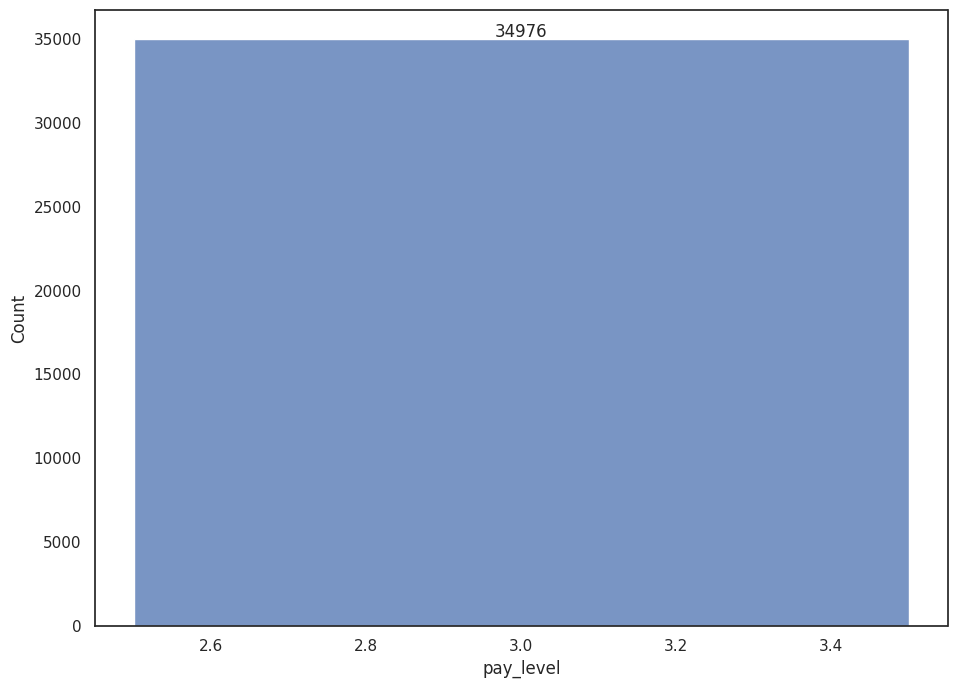

In [73]:
# it seems that my Y training is imbalance becasue the non existing is bigger than other outcomes
ax=sns.histplot(data=y_train)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Dealing with imbalance

https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

In [74]:
!pip install imblearn

In [75]:
'''from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)

X_new, y_new= rus.fit_resample(X_train_scaled, y_train)#X_train_scaled  X_train

y_new.value_counts()'''

'from imblearn.under_sampling import RandomUnderSampler\nrus = RandomUnderSampler(random_state=1)\n\nX_new, y_new= rus.fit_resample(X_train_scaled, y_train)#X_train_scaled  X_train\n\ny_new.value_counts()'

In [77]:
#oversampling
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html

ro = RandomOverSampler()

X_new, y_new = ro.fit_resample(X_train_scaled, y_train)

y_new.value_counts()

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [ ]:
ax=sns.histplot(data=y_new)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Training the tree model

In [ ]:
 from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=10)#max_leaf_nodes=10, random_state=0

In [ ]:
clf = clf.fit(X_new, y_new)

In [ ]:
tree.plot_tree(clf)

In [ ]:

# Identify the most important columns
# The zip function pairs each object
importance = clf.feature_importances_
df = pd.DataFrame(list(zip(importance, X.columns.to_list())),columns =['importance', 'feature'])
#print(importance,X.columns.to_list())

df = df.sort_values(by='importance')
df.head()


In [ ]:
# Visualize a bar graph of feature importance scores
sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(data=df,x='importance',y='feature')
# number employed is being used as an indicator of how the economy is doing

## Predictions with Model

In [ ]:
test_predictions=clf.predict(X_test_scaled) #X_test_scaled

In [ ]:
test_predictions

In [ ]:
y_train.count()

## Evaluate

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predictions)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

In [ ]:
# confution Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, test_predictions)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
sns.set()

unique_labels = np.unique(y_test)

sns.heatmap(cm,fmt="d", annot=True, cmap="Blues",
             xticklabels=unique_labels, yticklabels=unique_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Use model

In [ ]:
df_use=pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv')

In [ ]:
df_use.info()

In [ ]:
import numpy as np
df = df_use
df.replace(r"unknown", np.nan, inplace=True)

In [ ]:
df_use = df_use.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_use['marital'] = df_use['marital'].astype('category')
df_use['contact'] = df_use['contact'].astype('category')
df_use['default'] = df_use['default'].astype('category')
df_use['housing'] = df_use['housing'].astype('category')
df_use['loan'] = df_use['loan'].astype('category')
df_use['day_of_week'] = df_use['day_of_week'].astype('category')


# cat codes
df_use['marital'] = df_use['marital'].cat.codes
df_use['contact'] = df_use['contact'].cat.codes
df_use['default'] = df_use['default'].cat.codes
df_use['housing'] = df_use['housing'].cat.codes
df_use['day_of_week'] = df_use['day_of_week'].cat.codes
df_use=pd.get_dummies(df_use, columns=['job'], drop_first=True)
df_use=pd.get_dummies(df_use, columns=['education'], drop_first=True)
df_use = pd.get_dummies(df_use, columns=['month'], drop_first=True)

In [ ]:
df_use['poutcome'] = np.where((df_use["poutcome"] == "nonexistent") | (df_use["poutcome"] == "failure"), 0, 1)

In [ ]:
df_use

In [ ]:
X_use = df_use[['age', 'marital', 'contact',
        'previous','nr.employed',
       'euribor3m']]
X.head(5)


In [ ]:
X_use.count()
X_test_scaled = X_scaler.transform(X_use)

In [ ]:
test_predictions1=clf.predict(X_test_scaled)



In [ ]:
# Create a DataFrame with predictions
predictions_df1 = pd.DataFrame({'Prediction': test_predictions1})

# Save predictions to a CSV file
predictions_df1.to_csv('team8-module2-predictions.csv', index=False)